# DSC540 Project 2

DePaul University  
Ilyas Ustun, PhD  
Chicago, IL  

## Rules
- Do not change the code already present in the notebook.
- Write your code under the corresponding questions where you see `# Code here`. You are encouraged to use more than one cell.
- Provide explanation in a separate Markdown formatted cell. 
- You can change the cell type by:
    - Clicking on the outer area of the cell type you want to change,
    - Go to the top, and select either Code or Markdown from the dropdown menu.
- Be concise in your explanations and conclusions.
- Write clear code and provide explanation to functions you create by using `#` comment sign.
- For built-in function and methods you use from libraries, provide a very brief explanation of what they do.
- Try to answer the questions by yourself. Use documentation from pandas, sklearn and similar libraries to solve the problem.
- If you are stuck you can use different resources. Do not find an identical project and copy paste the solutions. 
- Write your name before beginning to code.

> **Once you have completed your project, and you are done with coding restart your kernel and run everything. Make sure it runs without errors.**  
    - For this go to the very top where the tabs are located:
        - Kernel  
            - Restart & Run All  
    - We will check whether the code and results in this notebook is running fine.  


Important:  
- **Do NOT share the solutions with other people.**
- **Do NOT share the solutions on the internet including but not limited to Github and other platforms.**
- Sign the Honor Pledge below indicating that you have agreed to these rules listed here, and any other ethical and honor rules as required by the university.



- **Deliverables:**
    1. The Python Jupyter notebook file named properly with your name. Example: dsc540_project1_john_doe.ipynb
    2. The HTML output of this code notebook names the same way. Example: dsc540_project1_john_doe.html
        - File -> Download as -> HTML   
    3. The label predictions as csv file. -> See last question.

Good Luck!

### Serena Yang

**Honor Pledge:**  
I pledge on my honor that I, **Serena Yang**, have followed the rules listed above, that I have not given or received any unauthorized assistance on this assignment. 



## Project Description

For this project we will be exploring publicly available data from [LendingClub.com](www.lendingclub.com).  
Lending Club connects people who need money (borrowers) with people who have money (investors).   
Hopefully, as an investor you would want to invest in people who showed a profile of having a high probability of paying you back. We will try to create a model that will help predict this.

Check out more info on Lending Club on [Wikipedia](https://en.wikipedia.org/wiki/Lending_Club). Lending Club also had a [very interesting year in 2016](https://en.wikipedia.org/wiki/Lending_Club#2016).

This dataset is from before they went public.

We will use lending data from 2007-2010 and will try to classify and predict whether or not the borrower paid back their loan in full. You will analyze the data file provided. 

Here are what the columns represent:
* credit.policy: 1 if the customer meets the credit underwriting criteria of LendingClub.com, and 0 otherwise.
* purpose: The purpose of the loan (takes values "credit_card", "debt_consolidation", "educational", "major_purchase", "small_business", and "all_other").
* int.rate: The interest rate of the loan, as a proportion (a rate of 11% would be stored as 0.11). Borrowers judged by LendingClub.com to be more risky are assigned higher interest rates.
* installment: The monthly installments owed by the borrower if the loan is funded.
* log.annual.inc: The natural log of the self-reported annual income of the borrower.
* dti: The debt-to-income ratio of the borrower (amount of debt divided by annual income).
* fico: The FICO credit score of the borrower.
* days.with.cr.line: The number of days the borrower has had a credit line.
* revol.bal: The borrower's revolving balance (amount unpaid at the end of the credit card billing cycle).
* revol.util: The borrower's revolving line utilization rate (the amount of the credit line used relative to total credit available).
* inq.last.6mths: The borrower's number of inquiries by creditors in the last 6 months.
* delinq.2yrs: The number of times the borrower had been 30+ days past due on a payment in the past 2 years.
* pub.rec: The borrower's number of derogatory public records (bankruptcy filings, tax liens, or judgments).
* not.fully.paid: Whether the loan was paid back or not.

## Import Libraries

**Import the usual libraries for pandas and plotting, and sklearn.**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
import sklearn
sklearn.__version__

'0.23.2'

In [3]:
pd.set_option('display.max_columns', 100)

### These are the packages I used

In [4]:
# Your package imports here
import warnings
warnings.filterwarnings('ignore')

# Q1
- Read in the dataset `loan_data.csv`
- How many rows and variables are there?
- What are the unique values of `not.fully.paid`?
- `not.fully.paid` having a value of 1 means that the person who took the loan did not fully pay it back. What's the proportion of those people in the full dataset?

## Get the Data

**Use pandas to read loan_data.csv as a dataframe called loans.**

In [5]:
loans = pd.read_csv('loans_train.csv')
loans_outcome_not_known = pd.read_csv('loans_outcome_not_known.csv')

In [6]:
loans.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,credit_card,0.0800,101.85,10.596635,10.26,747,7560.000000,18467,30.9,3,0,0,0
1,1,all_other,0.1114,328.04,10.530495,14.13,722,1920.000000,6811,56.8,0,0,0,0
2,1,debt_consolidation,0.1324,676.20,11.289782,20.73,697,4080.000000,16805,64.1,0,0,0,0
3,1,debt_consolidation,0.1103,671.44,10.555813,15.72,722,3580.041667,31566,32.3,1,0,0,1
4,0,debt_consolidation,0.1545,244.21,10.308953,18.80,647,1950.041667,4587,41.0,2,0,0,0


In [7]:
loans_outcome_not_known.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec
0,1,debt_consolidation,0.1324,540.96,10.596635,11.73,672,3210.000000,5671,55.1,0,0,0
1,0,educational,0.1221,333.15,11.156193,15.82,707,5314.000000,107643,81.0,3,0,0
2,1,debt_consolidation,0.1218,166.50,10.753836,6.38,772,1440.000000,233,6.7,0,0,0
3,0,major_purchase,0.1461,124.12,10.239960,0.00,692,1530.041667,0,0.0,6,0,0
4,1,credit_card,0.0800,156.69,10.434116,15.85,767,10170.000000,5748,12.3,0,1,0


**Check out the info(), head(), and describe() methods on loans.**

In [8]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7478 entries, 0 to 7477
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      7478 non-null   int64  
 1   purpose            7478 non-null   object 
 2   int.rate           7478 non-null   float64
 3   installment        7478 non-null   float64
 4   log.annual.inc     7478 non-null   float64
 5   dti                7478 non-null   float64
 6   fico               7478 non-null   int64  
 7   days.with.cr.line  7478 non-null   float64
 8   revol.bal          7478 non-null   int64  
 9   revol.util         7478 non-null   float64
 10  inq.last.6mths     7478 non-null   int64  
 11  delinq.2yrs        7478 non-null   int64  
 12  pub.rec            7478 non-null   int64  
 13  not.fully.paid     7478 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 818.0+ KB


In [9]:
# YOUR CODE
#How many rows and variables are there?
loans.shape

(7478, 14)

In [10]:
#What are the unique values of not.fully.paid?
loans['not.fully.paid'].unique()

array([0, 1])

In [11]:
#not.fully.paid having a value of 1 means that the person who took the loan did not fully pay it back. 
#What's the proportion of those people in the full dataset?
non_paid_proportion = loans['not.fully.paid'].sum()/loans['not.fully.paid'].count()
non_paid_proportion

0.19162877774806097

# Q2
- Visual and Exploratory Analysis
- Carry out the tasks given below

## Exploratory Data Analysis

- Let's do some data visualization! 
- You can use many different visualization libraries inclusing matplotlib, seaborn, pandasand many more. Feel free to use whatever library you want. Don't worry about the colors matching, just worry about getting the main idea of the plot.

**Create a histogram of two FICO distributions on top of each other, one for each credit.policy outcome.**

*Note: You'll probably need one line of code for each histogram, I also recommend just using pandas built in .hist()*

Text(0.5, 0, 'FICO')

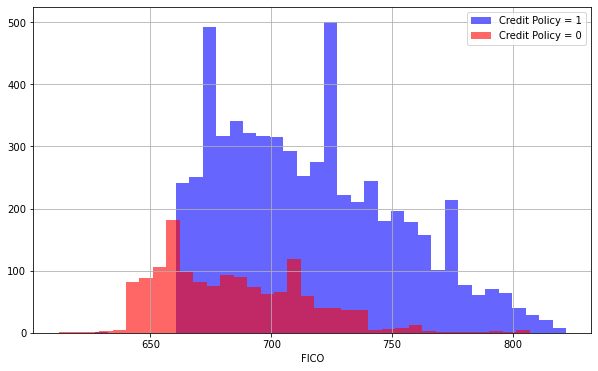

In [12]:
# YOUR CODE
plt.figure(figsize=(10,6))
loans[loans['credit.policy']==1]['fico'].hist(bins=35,color='blue', alpha=0.6,label='Credit Policy = 1')
loans[loans['credit.policy']==0]['fico'].hist(bins=35,color='red', alpha=0.6,label='Credit Policy = 0')
plt.legend()
plt.xlabel("FICO")

**Create a similar figure, except this time select by the not.fully.paid column.**

Text(0.5, 0, 'FICO')

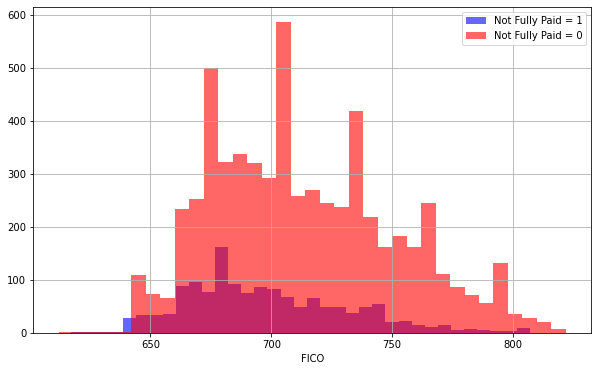

In [13]:
# YOUR CODE
plt.figure(figsize=(10,6))
loans[loans['not.fully.paid']==1]['fico'].hist(bins=35,color='blue', alpha=0.6,label='Not Fully Paid = 1')
loans[loans['not.fully.paid']==0]['fico'].hist(bins=35,color='red', alpha=0.6,label='Not Fully Paid = 0')
plt.legend()
plt.xlabel("FICO")

**Create a countplot (bar plot showing counts using seaborn) that shows the counts of loans by purpose, with the color hue defined by `not.fully.paid`**

<AxesSubplot:xlabel='purpose', ylabel='count'>

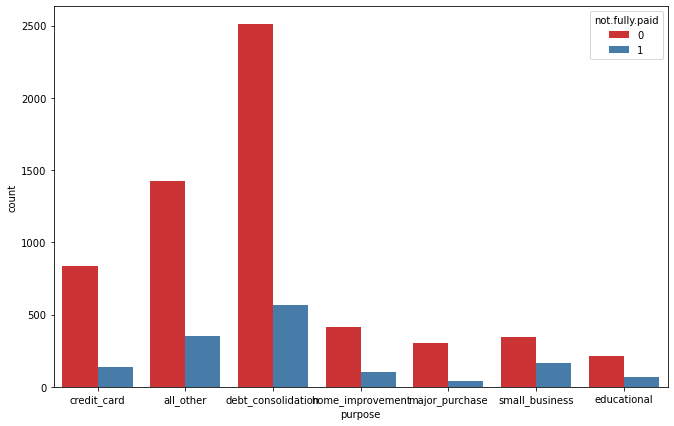

In [14]:
# YOUR CODE
plt.figure(figsize=(11,7))
sns.countplot(x='purpose',hue='not.fully.paid',data=loans,palette='Set1')

**Let's see the trend between FICO score and interest rate. Recreate the following jointplot.**

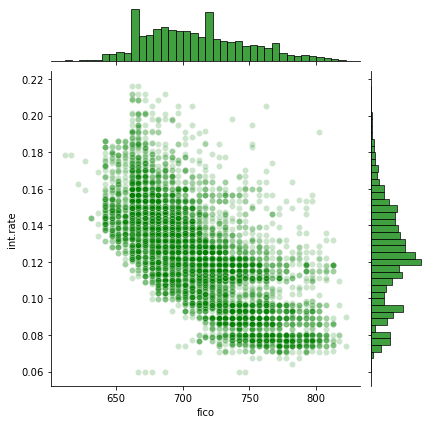

In [15]:
# YOUR CODE
sns.jointplot(x='fico', y='int.rate',data=loans, color='green', alpha=0.2)
plt.show()

**Create the following lmplots to see if the trend differed between `not.fully.paid` and `credit.policy`. Check the documentation for seaborn `lmplot()` if you can't figure out how to separate it into columns.**

<Figure size 792x504 with 0 Axes>

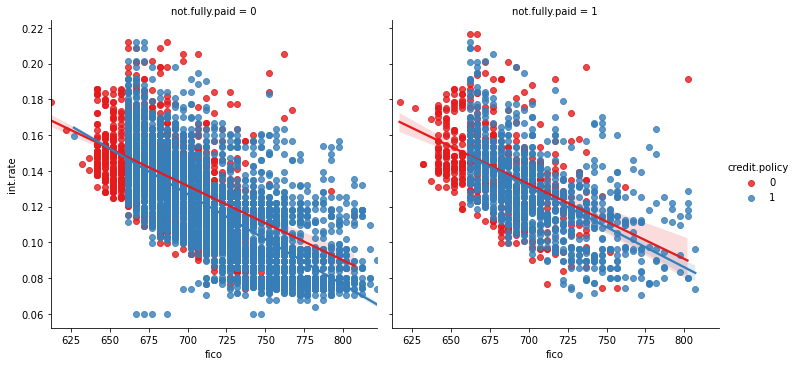

In [16]:
# YOUR CODE
plt.figure(figsize=(11,7))
sns.lmplot(y='int.rate',x='fico',data=loans,hue='credit.policy',col='not.fully.paid',palette='Set1')

# Q3

## Setting up the Data

Let's get ready to set up our data for our models!

**Check loans.info() again.**

In [17]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7478 entries, 0 to 7477
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      7478 non-null   int64  
 1   purpose            7478 non-null   object 
 2   int.rate           7478 non-null   float64
 3   installment        7478 non-null   float64
 4   log.annual.inc     7478 non-null   float64
 5   dti                7478 non-null   float64
 6   fico               7478 non-null   int64  
 7   days.with.cr.line  7478 non-null   float64
 8   revol.bal          7478 non-null   int64  
 9   revol.util         7478 non-null   float64
 10  inq.last.6mths     7478 non-null   int64  
 11  delinq.2yrs        7478 non-null   int64  
 12  pub.rec            7478 non-null   int64  
 13  not.fully.paid     7478 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 818.0+ KB


## Categorical Features

Notice that the **purpose** column is of categorical type.

That means we need to transform them using dummy variables so sklearn will be able to understand them. Let's do this in one clean step using pd.get_dummies().

Let's show you a way of dealing with these columns that can be expanded to multiple categorical features if necessary.

**Create a list of 1 element containing the string 'purpose'. Call this list cat_feats.**

> The same transformation needs to be aplied on every dataset. The easiest way would be to merge train and test (loans_outcome_not_known) sets, and to split after the transformation.

In [18]:
loans.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,credit_card,0.0800,101.85,10.596635,10.26,747,7560.000000,18467,30.9,3,0,0,0
1,1,all_other,0.1114,328.04,10.530495,14.13,722,1920.000000,6811,56.8,0,0,0,0
2,1,debt_consolidation,0.1324,676.20,11.289782,20.73,697,4080.000000,16805,64.1,0,0,0,0
3,1,debt_consolidation,0.1103,671.44,10.555813,15.72,722,3580.041667,31566,32.3,1,0,0,1
4,0,debt_consolidation,0.1545,244.21,10.308953,18.80,647,1950.041667,4587,41.0,2,0,0,0


**Now you can use `pd.get_dummies(loans,columns=cat_feats)` to create a fixed larger dataframe that has new feature columns with dummy variables.**

In [19]:
# YOUR CODE
cat_feats = ['purpose']
data = pd.get_dummies(loans,columns=cat_feats,drop_first=True)
data.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.0800,101.85,10.596635,10.26,747,7560.000000,18467,30.9,3,0,0,0,1,0,0,0,0,0
1,1,0.1114,328.04,10.530495,14.13,722,1920.000000,6811,56.8,0,0,0,0,0,0,0,0,0,0
2,1,0.1324,676.20,11.289782,20.73,697,4080.000000,16805,64.1,0,0,0,0,0,1,0,0,0,0
3,1,0.1103,671.44,10.555813,15.72,722,3580.041667,31566,32.3,1,0,0,1,0,1,0,0,0,0
4,0,0.1545,244.21,10.308953,18.80,647,1950.041667,4587,41.0,2,0,0,0,0,1,0,0,0,0


In [20]:
data.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
count,7478.000000,7478.000000,7478.000000,7478.000000,7478.000000,7478.000000,7478.000000,7.478000e+03,7478.000000,7478.000000,7478.000000,7478.000000,7478.000000,7478.000000,7478.000000,7478.000000,7478.000000,7478.000000,7478.000000
mean,0.800615,0.123130,322.555320,10.936374,12.624763,710.180663,4543.688470,1.729738e+04,46.917329,1.618748,0.161942,0.063921,0.191629,0.129981,0.411206,0.037443,0.068735,0.046403,0.067933
std,0.399565,0.026727,208.950622,0.621971,6.896500,37.537593,2477.818646,3.601391e+04,28.982548,2.244517,0.530832,0.263576,0.393609,0.336305,0.492085,0.189858,0.253020,0.210370,0.251647
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,180.041667,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.105100,165.425000,10.555813,7.200000,682.000000,2820.000000,3.109000e+03,23.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122900,271.110000,10.933107,12.680000,707.000000,4110.041667,8.654000e+03,46.600000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.141100,441.600000,11.302204,17.992500,737.000000,5700.958333,1.827000e+04,70.775000,2.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.180154,29.960000,822.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Train Test Split

Now its time to split our data into a training set and a validation set!  

The `not.fully.paid` variable is the one that we will try to predict.

**Use sklearn to split your data into a training set and a testing set as we've done in the past.**

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X = data.drop('not.fully.paid',axis=1)
y = data['not.fully.paid']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=2020)

In [23]:
X_train.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
613,0,0.1450,172.11,11.401994,16.57,647,5129.958333,21251,80.8,0,0,0,0,1,0,0,0,0
5734,1,0.1008,387.66,11.775290,21.20,772,6750.041667,74885,0.0,0,0,0,0,0,0,0,0,0
7118,1,0.1253,401.60,10.819778,16.08,712,5430.000000,15244,66.6,0,0,1,0,1,0,0,0,0
4418,1,0.0963,288.85,11.608236,18.41,737,3481.041667,2737,6.4,1,0,0,1,0,0,0,0,0
2609,1,0.1229,320.19,11.264464,8.80,672,3760.958333,4822,58.1,0,0,1,0,1,0,0,0,0


# Q4

## Decision Tree Model

Let's start by training a single decision tree first!


- Initiate the Decision Tree classifier from the sklearn library. Keep all parameters with their default values. (No need to specify anything)
- Fit the model
- Make predictions
- Calculate accuracy score. What are the **training** and **testing** accuracies of the model?
- Create confusion matrix
- Either using the confusion matrix or the methods in `sklearn.metrics` get the following metrics on the testing set:
     - Recall (Sensitivity)
     - Specificity
     - Precision
     - Balanced Accuracy
     - F1 Score
- Using all the training data perform cross-validation:
    - Select the `min_samples_split` hyper-parameter and apply cross validation to find the best value.  
    - Select the `max_depth` hyper-parameter and apply cross validation to find the best value. 
    - Perform grid search where you check for combinations of these hyper-parameters.
        - https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
- For the best model:
    - Plot the decision tree of the best model
    - Either using the confusion matrix or the methods in `sklearn.metrics` get the following metrics on the testing set:
         - Recall (Sensitivity)
         - Specificity
         - Precision
         - Balanced Accuracy
         - F1 Score
    - Compare the results to the model with default paramters. Any change?

In [24]:
# Import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.metrics import balanced_accuracy_score

In [25]:
# YOUR CODE
def fit_predict_score(name,clf):
    clf.fit(X_train, np.ravel(y_train))
    predicted = clf.predict(X_test)
    confusion_matrix =  pd.crosstab(index=np.ravel(y_test), columns=predicted.ravel(), rownames=['Expected'], colnames=['Predicted'])
    sns.heatmap(confusion_matrix, annot=True, square=False, fmt='', cbar=False)
    accuracy = np.round(metrics.accuracy_score(y_test , predicted),3)
    plt.title(name + " " + str(accuracy), fontsize = 15)
    plt.show()
    dt_met = metrics.classification_report(y_true = y_test, y_pred = predicted,  output_dict=True)
    print(metrics.classification_report(y_test,predicted))
    print("\nSummary:")
    print("Recall/Sensitivity: %f"%(dt_met['1']['recall']))
    print("Specificity: %f"%(dt_met['0']['recall']))
    print("Precision: %f"%(dt_met['1']['precision']))
    print("Balanced Accuracy: %f"%(balanced_accuracy_score(y_test, predicted)))
    print("F1-score: %f"%(dt_met['1']['f1-score']))

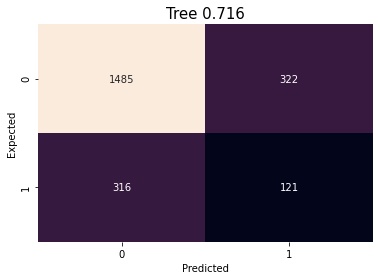

              precision    recall  f1-score   support

           0       0.82      0.82      0.82      1807
           1       0.27      0.28      0.27       437

    accuracy                           0.72      2244
   macro avg       0.55      0.55      0.55      2244
weighted avg       0.72      0.72      0.72      2244


Summary:
Recall/Sensitivity: 0.276888
Specificity: 0.821804
Precision: 0.273138
Balanced Accuracy: 0.549346
F1-score: 0.275000


In [26]:
tree = DecisionTreeClassifier()
fit_predict_score('Tree',tree)

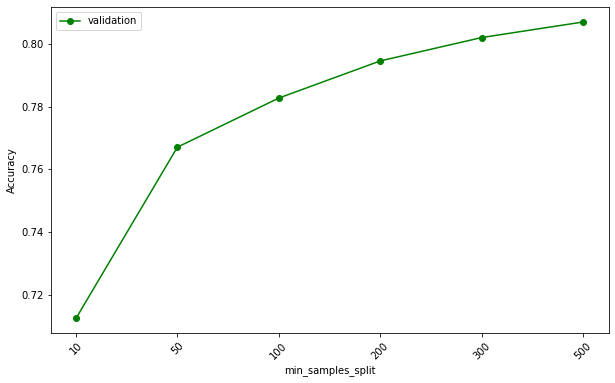

In [27]:
#Select the min_samples_split hyper-parameter and apply cross validation to find the best value. 
temp = [10, 50, 100, 200, 300, 500]
accuracy_valid = []
for min in temp:
    dt = DecisionTreeClassifier(min_samples_split= min, random_state = 42)
    dt.fit(X_train, y_train)
    pred_train = dt.predict(X_train)
    score_valid= cross_val_score(dt,X_train, y_train, scoring = "accuracy", cv = 5 )
    accuracy_valid.append(score_valid.mean())
    
plt.figure(figsize=(10,6))
plt.plot(accuracy_valid, 'go-',label = 'validation')
plt.xticks(np.arange(len(temp)), temp, rotation = 45)
plt.xlabel('min_samples_split')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
#min_samples_split = 500

In [28]:
print("Accuracy score: ")
accuracy_valid

Accuracy score: 


[0.7124511259521423,
 0.7670963747829088,
 0.7827649242760432,
 0.794610660340662,
 0.802062343288025,
 0.8070309232789304]

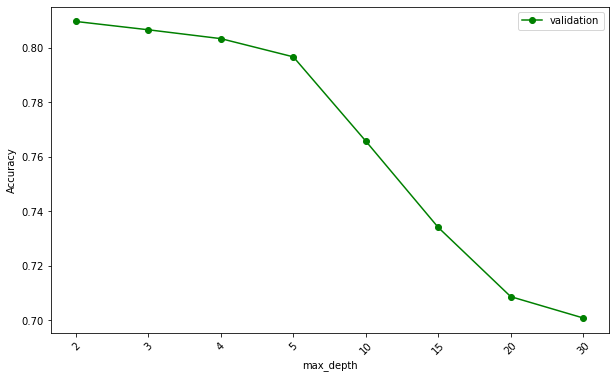

In [29]:
#Select the max_depth hyper-parameter and apply cross validation to find the best value.
temp = [2, 3, 4, 5, 10, 15, 20, 30]
accuracy_valid = []
for max in temp:
    dt = DecisionTreeClassifier(max_depth=max, random_state = 42)
    dt.fit(X_train, y_train)
    pred_train = dt.predict(X_train)
    score_valid= cross_val_score(dt,X_train, y_train, scoring = "accuracy", cv = 5 )
    accuracy_valid.append(score_valid.mean())
    
plt.figure(figsize=(10,6))
plt.plot(accuracy_valid, 'go-',label = 'validation')
plt.xticks(np.arange(len(temp)), temp, rotation = 45)
plt.xlabel('max_depth')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

#Max Depth Values = 2

In [30]:
print("Accuracy score: ")
accuracy_valid

Accuracy score: 


[0.8097057786884498,
 0.8066483314797264,
 0.8034011406531636,
 0.7967120846048348,
 0.7657586731460734,
 0.7340419043027424,
 0.7086308692230009,
 0.7007978728261207]

In [31]:
#Perform grid search where you check for combinations of these hyper-parameters.
from sklearn.model_selection import GridSearchCV
min_list = [10, 50, 100, 200, 300, 500]
max_list = [2, 3, 4]
params = {'min_samples_split': min_list,'max_depth': max_list, 'random_state': [42]}

dt = DecisionTreeClassifier()
grid = GridSearchCV(estimator=dt, param_grid=params, cv=5, scoring="balanced_accuracy")
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [2, 3, 4],
                         'min_samples_split': [10, 50, 100, 200, 300, 500],
                         'random_state': [42]},
             scoring='balanced_accuracy')

In [32]:
grid.best_params_

{'max_depth': 4, 'min_samples_split': 100, 'random_state': 42}

In [33]:
#Plot the decision tree of the best model
dt = DecisionTreeClassifier(max_depth = 4, min_samples_split = 100, random_state = 42)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, min_samples_split=100, random_state=42)

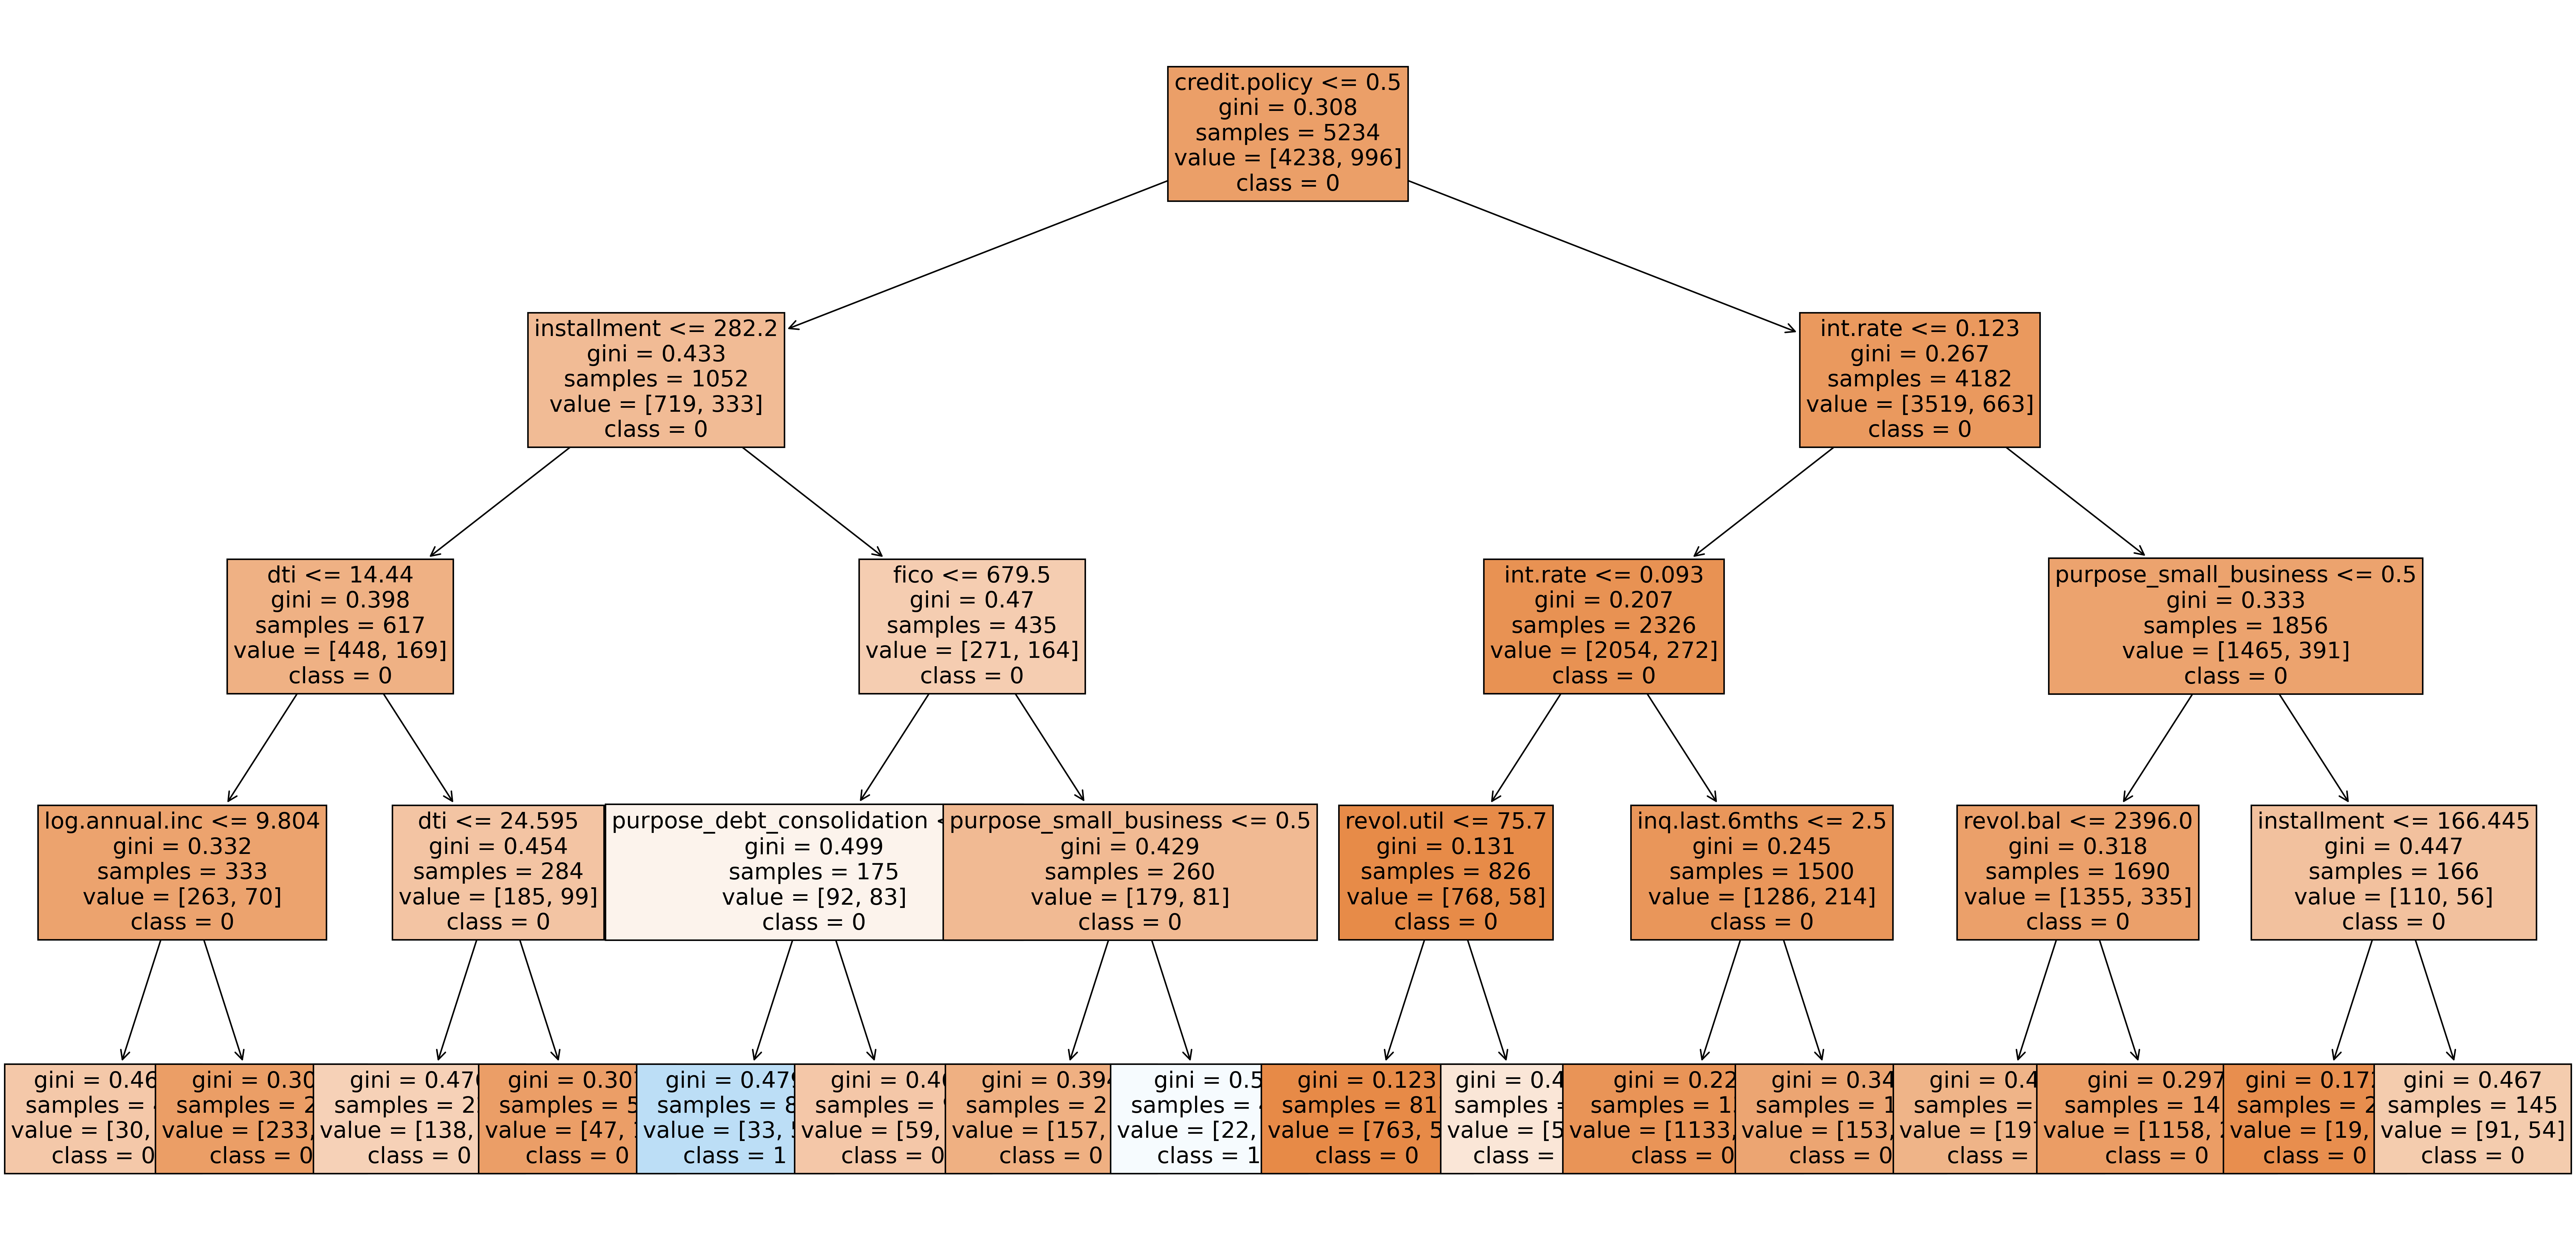

In [34]:
from sklearn import tree
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (30,15), dpi=300)
tree.plot_tree(dt,feature_names = X_train.columns, class_names=['0','1'], filled = True, fontsize=15);

In [35]:
#Accuracy Train
pred_train = dt.predict(X_train)
print("Accuracy Scores (Train): ",metrics.accuracy_score(y_true = y_train, y_pred = pred_train))

#Accuracy Test
pred = dt.predict(X_test)
print("Accuracy Scores (Test): ",metrics.accuracy_score(y_true = y_test, y_pred = pred))

Accuracy Scores (Train):  0.8131448223156286
Accuracy Scores (Test):  0.803030303030303


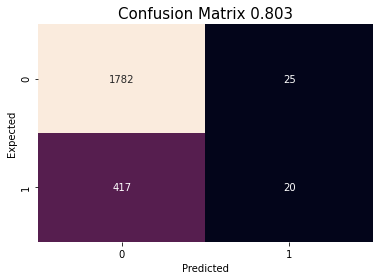

              precision    recall  f1-score   support

           0       0.81      0.99      0.89      1807
           1       0.44      0.05      0.08       437

    accuracy                           0.80      2244
   macro avg       0.63      0.52      0.49      2244
weighted avg       0.74      0.80      0.73      2244


Summary:
Recall/Sensitivity: 0.045767
Specificity: 0.986165
Precision: 0.444444
Balanced Accuracy: 0.515966
F1-score: 0.082988


In [36]:
fit_predict_score('Confusion Matrix',grid)   

In [37]:
#Compare the results to the model with default paramters. Any change?
#default: Recall/Sensitivity: 0.276888 Specificity: 0.821804 Precision: 0.273138 
#                Balanced Accuracy: 0.549346 F1-score: 0.275000
#second: Recall/Sensitivity: 0.045767 Specificity: 0.986165 Precision: 0.444444 
#                Balanced Accuracy: 0.515966 F1-score: 0.082988
#Yes, there are some improvements on the second model. The specificity, precision, F1-score are all 
#higher than the deault model, therefore the performance of second one is better than the default one.

# Q5

## Random Forest model

- Initiate the Random Forest classifier from the sklearn library. Keep all parameters with their default values. (No need to specify anything)
- Fit the model
- Make predictions
- Calculate accuracy score. What are the **training** and **testing** accuracies of the model?
- Create confusion matrix
- Either using the confusion matrix or the methods in `sklearn.metrics` get the following metrics on the testing set:
     - Recall (Sensitivity)
     - Specificity
     - Precision
     - Balanced Accuracy
     - F1 Score
- Using all the training data perform cross-validation:
    - Select the `min_samples_split` hyper-parameter and apply cross validation to find the best value.  
    - Select the `max_depth` hyper-parameter and apply cross validation to find the best value. 
    - Select the `n_estimators` hyper-parameter and apply cross validation to find the best value. 
    - Perform grid search where you check for combinations of these hyper-parameters.
        - https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
- For the best model:
    - Either using the confusion matrix or the methods in `sklearn.metrics` get the following metrics on the testing set:
         - Recall (Sensitivity)
         - Specificity
         - Precision
         - Balanced Accuracy
         - F1 Score
    - Compare the results to the model with default paramters. Any change?

In [38]:
from sklearn.ensemble import RandomForestClassifier

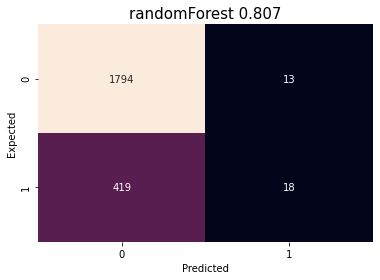

              precision    recall  f1-score   support

           0       0.81      0.99      0.89      1807
           1       0.58      0.04      0.08       437

    accuracy                           0.81      2244
   macro avg       0.70      0.52      0.48      2244
weighted avg       0.77      0.81      0.73      2244


Summary:
Recall/Sensitivity: 0.041190
Specificity: 0.992806
Precision: 0.580645
Balanced Accuracy: 0.516998
F1-score: 0.076923


In [39]:
clf_rf = RandomForestClassifier(n_estimators=100)
fit_predict_score('randomForest',clf_rf)

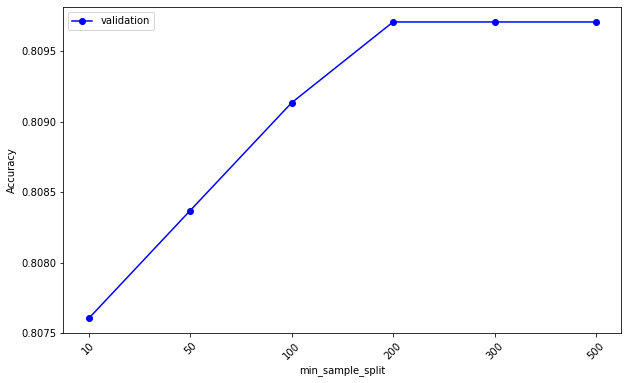

In [40]:
# YOUR CODE
#Select the min_sample_split hyper-parameter and apply cross validation to find the best value.
MinS_list = [10, 50, 100, 200, 300, 500]
accuracy_valid = []
for min in MinS_list:
    rf = RandomForestClassifier(min_samples_split= min , random_state = 42)
    rf.fit(X_train, y_train)
    pred_train = rf.predict(X_train)
    score_valid= cross_val_score(rf,X_train, y_train, scoring = "accuracy", cv =5 )
    accuracy_valid.append(score_valid.mean())
    
plt.figure(figsize=(10,6))
plt.plot(accuracy_valid, 'bo-',label = 'validation')
plt.xticks(np.arange(len(MinS_list)), MinS_list, rotation = 45)
plt.xlabel('min_sample_split')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

#min_samples_split = 200

In [41]:
print("Accuracy score: ")
accuracy_valid

Accuracy score: 


[0.8076038065601253,
 0.808368624915766,
 0.809132712785871,
 0.8097057786884498,
 0.8097057786884498,
 0.8097057786884498]

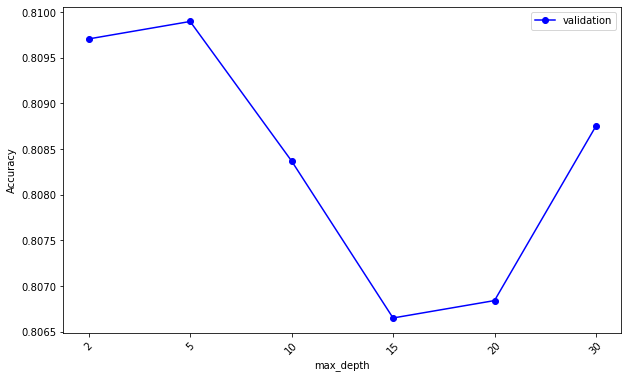

In [42]:
#Select the max_depth hyper-parameter and apply cross validation to find the best value.
MaxD_list = [2, 5, 10, 15, 20, 30]
accuracy_valid = []
for max in MaxD_list:
    rf = RandomForestClassifier(max_depth=max, random_state = 42)
    rf.fit(X_train, y_train)
    pred_train = rf.predict(X_train)
    score_valid= cross_val_score(rf,X_train, y_train, scoring = "accuracy", cv =5 )
    accuracy_valid.append(score_valid.mean())

plt.figure(figsize=(10,6))
plt.plot(accuracy_valid, 'bo-',label = 'validation')
plt.xticks(np.arange(len(MaxD_list)), MaxD_list, rotation = 45)
plt.xlabel('max_depth')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

#Max Depth Value = 5

In [43]:
print("Accuracy score: ")
accuracy_valid

Accuracy score: 


[0.8097057786884498,
 0.809896800655976,
 0.8083686249157658,
 0.8066492445866456,
 0.806839901311404,
 0.8087517645791216]

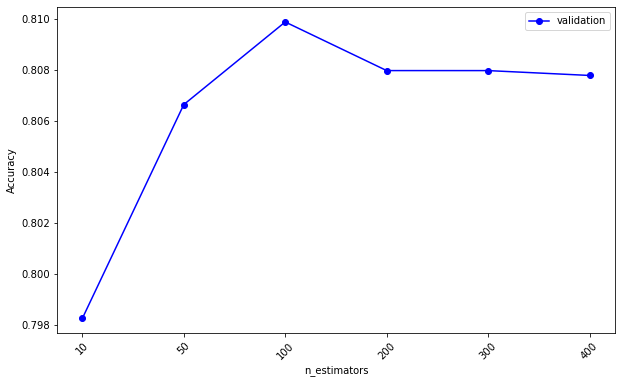

In [44]:
#Select the n_estimators hyper-parameter and apply cross validation to find the best value.
Est_list = [10, 50, 100, 200, 300, 400]
accuracy_valid = []
for est in Est_list:
    rf = RandomForestClassifier(n_estimators=est, random_state = 42)
    rf.fit(X_train, y_train)
    pred_train = rf.predict(X_train)
    score_valid= cross_val_score(rf,X_train, y_train, scoring = "accuracy", cv =5 )
    accuracy_valid.append(score_valid.mean())
    
plt.figure(figsize=(10,6))
plt.plot(accuracy_valid, 'bo-',label = 'validation')
plt.xticks(np.arange(len(Est_list)), Est_list, rotation = 45)
plt.xlabel('n_estimators')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

#n_estimators:100

In [45]:
print("Accuracy score: ")
accuracy_valid

Accuracy score: 


[0.7982422691802673,
 0.8066496098294132,
 0.8098977137628953,
 0.8079863983593295,
 0.8079860331165618,
 0.8077951937704194]

In [46]:
#Perform grid search where you check for combinations of these hyper-parameters.
params = {'n_estimators': Est_list,'min_samples_split': MinS_list,
         'max_depth': MaxD_list, 'random_state': [42]}

grid_rf = RandomForestClassifier()
grid = GridSearchCV(estimator=grid_rf, param_grid=params, verbose=1, cv=5,scoring="balanced_accuracy", n_jobs=-1)

In [47]:
grid.fit(X_train, y_train)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    4.1s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   18.2s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:   55.1s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 1080 out of 1080 | elapsed:  2.8min finished


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [2, 5, 10, 15, 20, 30],
                         'min_samples_split': [10, 50, 100, 200, 300, 500],
                         'n_estimators': [10, 50, 100, 200, 300, 400],
                         'random_state': [42]},
             scoring='balanced_accuracy', verbose=1)

In [48]:
grid.best_params_

{'max_depth': 20,
 'min_samples_split': 10,
 'n_estimators': 10,
 'random_state': 42}

In [49]:
grid.best_estimator_

RandomForestClassifier(max_depth=20, min_samples_split=10, n_estimators=10,
                       random_state=42)

In [50]:
#For the best model:
rf = RandomForestClassifier(max_depth=20, min_samples_split=10, n_estimators=10, random_state = 42)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=20, min_samples_split=10, n_estimators=10,
                       random_state=42)

In [51]:
#Accuracy Train
pred_train = rf.predict(X_train)
print("Accuracy Scores (Train): ",metrics.accuracy_score(y_true = y_train, y_pred = pred_train))

#Accuracy Test
pred = rf.predict(X_test)
print("Accuracy Scores (Test): ",metrics.accuracy_score(y_true = y_test, y_pred = pred))

Accuracy Scores (Train):  0.899885364921666
Accuracy Scores (Test):  0.7972370766488414


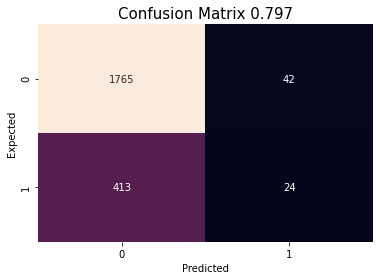

              precision    recall  f1-score   support

           0       0.81      0.98      0.89      1807
           1       0.36      0.05      0.10       437

    accuracy                           0.80      2244
   macro avg       0.59      0.52      0.49      2244
weighted avg       0.72      0.80      0.73      2244


Summary:
Recall/Sensitivity: 0.054920
Specificity: 0.976757
Precision: 0.363636
Balanced Accuracy: 0.515838
F1-score: 0.095427


In [52]:
fit_predict_score('Confusion Matrix',rf)  

In [53]:
#Compare the results to the model with default paramters. Any change?
#Default model: Recall/Sensitivity: 0.041190 Specificity: 0.992806 Precision: 0.580645 
#                Balanced Accuracy: 0.516998 F1-score: 0.076923
#The second model: Recall/Sensitivity: 0.054920 Specificity: 0.976757 Precision: 0.363636 
#                Balanced Accuracy: 0.515838 F1-score: 0.095427
#The second model doesn't increase any. Compare all the results between the default model and the second model.
#The default model works better on dataset.

# Q6

## Adaboost model

- Initiate the Random Forest classifier from the sklearn library. Keep all parameters with their default values. (No need to specify anything)
- Fit the model
- Make predictions
- Calculate accuracy score. What are the **training** and **testing** accuracies of the model?
- Create confusion matrix
- Either using the confusion matrix or the methods in `sklearn.metrics` get the following metrics on the testing set:
     - Recall (Sensitivity)
     - Specificity
     - Precision
     - Balanced Accuracy
     - F1 Score
- Using all the training data perform cross-validation:
    - Select the `learning_rate` hyper-parameter and apply cross validation to find the best value.  
    - Select the `n_estimators` hyper-parameter and apply cross validation to find the best value. 
    - Perform grid search where you check for combinations of these hyper-parameters.
        - https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
- For the best model:
    - Either using the confusion matrix or the methods in `sklearn.metrics` get the following metrics on the testing set:
         - Recall (Sensitivity)
         - Specificity
         - Precision
         - Balanced Accuracy
         - F1 Score
    - Compare the results to the model with default paramters. Any change?

In [54]:
from sklearn.ensemble import AdaBoostClassifier

In [55]:
AdaBoostClassifier()

AdaBoostClassifier()

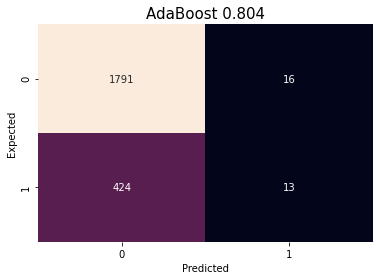

              precision    recall  f1-score   support

           0       0.81      0.99      0.89      1807
           1       0.45      0.03      0.06       437

    accuracy                           0.80      2244
   macro avg       0.63      0.51      0.47      2244
weighted avg       0.74      0.80      0.73      2244


Summary:
Recall/Sensitivity: 0.029748
Specificity: 0.991146
Precision: 0.448276
Balanced Accuracy: 0.510447
F1-score: 0.055794


In [56]:
# YOUR CODE
clf_ada = AdaBoostClassifier()
fit_predict_score('AdaBoost',clf_ada)

In [57]:
#Accuracy Train
pred_train = clf_ada.predict(X_train)
print("Accuracy Scores (Train): ",metrics.accuracy_score(y_true = y_train, y_pred = pred_train))

#Accuracy Test
pred = clf_ada.predict(X_test)
print("Accuracy Scores (Test): ",metrics.accuracy_score(y_true = y_test, y_pred = pred))

Accuracy Scores (Train):  0.8123805884600688
Accuracy Scores (Test):  0.803921568627451


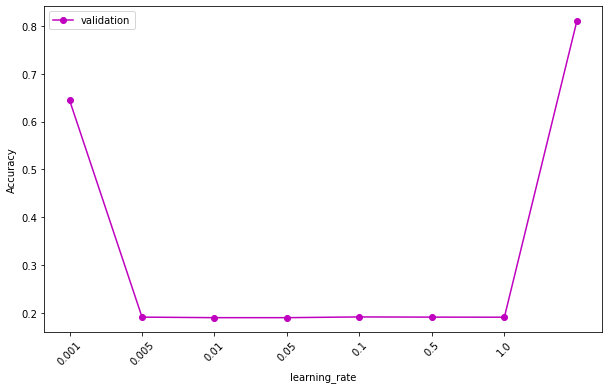

In [58]:
#Select the learning_rate hyper-parameter and apply cross validation to find the best value.
from sklearn.model_selection import cross_val_score
lr_temp = [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1.0]
accuracy_valid = []
for lr in temp:
    ab = AdaBoostClassifier(learning_rate=lr, random_state = 42)
    ab.fit(X_train, y_train)
    pred_train = ab.predict(X_train)
    score_valid= cross_val_score(ab,X_train, y_train, scoring = "accuracy", cv =5 )
    accuracy_valid.append(score_valid.mean())

plt.figure(figsize=(10,6))
plt.plot(accuracy_valid, 'mo-',label = 'validation')
plt.xticks(np.arange(len(lr_temp)), lr_temp, rotation = 45)
plt.xlabel('learning_rate')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [59]:
print("Accuracy score: ")
accuracy_valid

Accuracy score: 


[0.6445599829066384,
 0.19144035311670787,
 0.19029422131155024,
 0.19029422131155024,
 0.19182239705176038,
 0.19144035311670787,
 0.19124933114918158,
 0.8097057786884498]

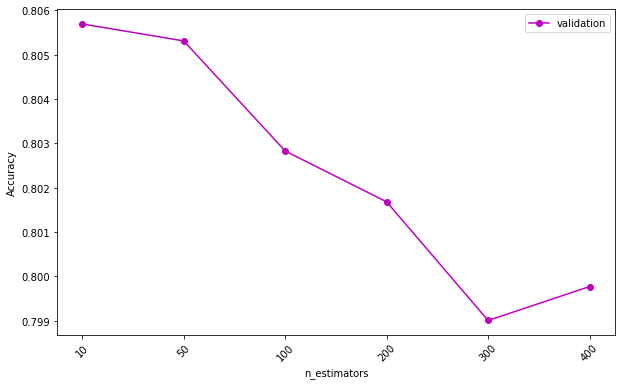

In [60]:
#Select the n_estimators hyper-parameter and apply cross validation to find the best value.
est_temp = [10, 50, 100, 200, 300, 400]
accuracy_valid = []
for est in est_temp:
    ab = AdaBoostClassifier(n_estimators=est, random_state = 42)
    ab.fit(X_train, y_train)
    pred_train = ab.predict(X_train)
    score_valid= cross_val_score(ab,X_train, y_train, scoring = "accuracy", cv =5 )
    accuracy_valid.append(score_valid.mean())

plt.figure(figsize=(10,6))
plt.plot(accuracy_valid, 'mo-',label = 'validation')
plt.xticks(np.arange(len(est_temp)), est_temp, rotation = 45)
plt.xlabel('n_estimators')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [61]:
print("Accuracy score: ")
accuracy_valid

Accuracy score: 


[0.8056930390207111,
 0.8053106298428908,
 0.8028273442650494,
 0.8016804819743563,
 0.799005626564837,
 0.7997706275418615]

In [62]:
#Grid Search
params = {'n_estimators': est_temp,'learning_rate': lr_temp, 'random_state': [42]}

grid_ab = AdaBoostClassifier()
grid = GridSearchCV(estimator=grid_ab, param_grid=params, cv=5, verbose =1, scoring="balanced_accuracy", n_jobs=-1)

In [63]:
grid.fit(X_train, y_train)

Fitting 5 folds for each of 42 candidates, totalling 210 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  51 tasks      | elapsed:    6.5s
[Parallel(n_jobs=-1)]: Done 210 out of 210 | elapsed:   31.9s finished


GridSearchCV(cv=5, estimator=AdaBoostClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.001, 0.005, 0.01, 0.05, 0.1, 0.5,
                                           1.0],
                         'n_estimators': [10, 50, 100, 200, 300, 400],
                         'random_state': [42]},
             scoring='balanced_accuracy', verbose=1)

In [64]:
grid.best_params_

{'learning_rate': 1.0, 'n_estimators': 400, 'random_state': 42}

In [65]:
grid.best_estimator_

AdaBoostClassifier(n_estimators=400, random_state=42)

In [66]:
#For the best model:
ab = AdaBoostClassifier(learning_rate=1.0, n_estimators=400, random_state = 42)
ab.fit(X_train, y_train)

AdaBoostClassifier(n_estimators=400, random_state=42)

In [67]:
#Accuracy Train
pred_train = ab.predict(X_train)
print("Accuracy Scores (Train): ",metrics.accuracy_score(y_true = y_train, y_pred = pred_train))

#Accuracy Test
pred = ab.predict(X_test)
print("Accuracy Scores (Test): ",metrics.accuracy_score(y_true = y_test, y_pred = pred))

Accuracy Scores (Train):  0.8261367978601452
Accuracy Scores (Test):  0.8003565062388592


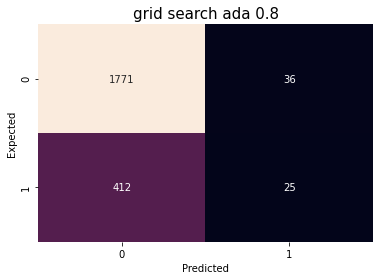

              precision    recall  f1-score   support

           0       0.81      0.98      0.89      1807
           1       0.41      0.06      0.10       437

    accuracy                           0.80      2244
   macro avg       0.61      0.52      0.49      2244
weighted avg       0.73      0.80      0.73      2244


Summary:
Recall/Sensitivity: 0.057208
Specificity: 0.980077
Precision: 0.409836
Balanced Accuracy: 0.518643
F1-score: 0.100402


In [68]:
fit_predict_score('grid search ada',ab)   

In [69]:
#Compare the results to the model with default paramters. Any change?
#The default model: Recall/Sensitivity: 0.029748 Specificity: 0.991146 
#            Precision: 0.448276 Balanced Accuracy: 0.510447 F1-score: 0.055794
#The second model: Recall/Sensitivity: 0.057208 Specificity: 0.980077 
#            Precision: 0.409836 Balanced Accuracy: 0.518643 F1-score: 0.100402
#These two models have the similar accuracy. The second one doesn't improve any, 
#even for some results getting decreased. But the differences were not significant.

# Q7

## Gradient Boost model

- Initiate the Random Forest classifier from the sklearn library. Keep all parameters with their default values. (No need to specify anything)
- Fit the model
- Make predictions
- Calculate accuracy score. What are the **training** and **testing** accuracies of the model?
- Create confusion matrix
- Either using the confusion matrix or the methods in `sklearn.metrics` get the following metrics on the testing set:
     - Recall (Sensitivity)
     - Specificity
     - Precision
     - Balanced Accuracy
     - F1 Score
- Using all the training data perform cross-validation:
    - Select the `learning_rate` hyper-parameter and apply cross validation to find the best value.  
    - Select the `n_estimators` hyper-parameter and apply cross validation to find the best value. 
    - Perform grid search where you check for combinations of these hyper-parameters.
        - https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
- For the best model:
    - Either using the confusion matrix or the methods in `sklearn.metrics` get the following metrics on the testing set:
         - Recall (Sensitivity)
         - Specificity
         - Precision
         - Balanced Accuracy
         - F1 Score
    - Compare the results to the model with default paramters. Any change?

In [70]:
from sklearn.ensemble import GradientBoostingClassifier

In [71]:
GradientBoostingClassifier()

GradientBoostingClassifier()

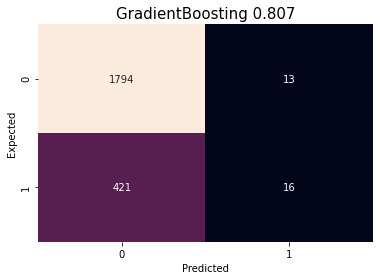

              precision    recall  f1-score   support

           0       0.81      0.99      0.89      1807
           1       0.55      0.04      0.07       437

    accuracy                           0.81      2244
   macro avg       0.68      0.51      0.48      2244
weighted avg       0.76      0.81      0.73      2244


Summary:
Recall/Sensitivity: 0.036613
Specificity: 0.992806
Precision: 0.551724
Balanced Accuracy: 0.514710
F1-score: 0.068670


In [72]:
# YOUR CODE
clf_gb = GradientBoostingClassifier()
fit_predict_score('GradientBoosting',clf_gb)

In [73]:
#Accuracy Train
pred_train = clf_gb.predict(X_train)
print("Accuracy Scores (Train): ",metrics.accuracy_score(y_true = y_train, y_pred = pred_train))

#Accuracy Test
pred = clf_gb.predict(X_test)
print("Accuracy Scores (Test): ",metrics.accuracy_score(y_true = y_test, y_pred = pred))

Accuracy Scores (Train):  0.8295758502101643
Accuracy Scores (Test):  0.8065953654188949


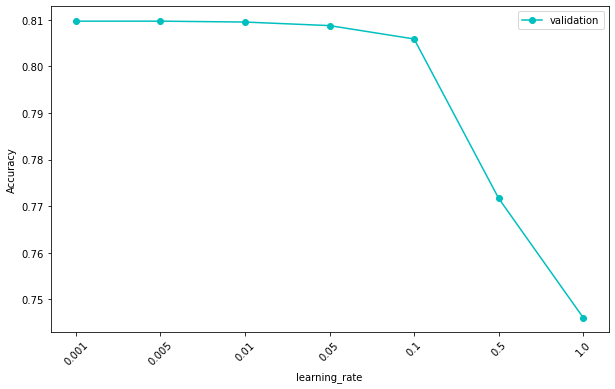

In [74]:
#Select the learning_rate hyper-parameter and apply cross validation to find the best value.
from sklearn.model_selection import cross_val_score
lr_temp = [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1.0]
accuracy_valid = []
for lr in lr_temp:
    gb = GradientBoostingClassifier(learning_rate=lr, random_state =42)
    gb.fit(X_train, y_train)
    pred_train = gb.predict(X_train)
    score_valid= cross_val_score(gb,X_train, y_train, scoring = "accuracy", cv =5 )
    accuracy_valid.append(score_valid.mean())
    
plt.figure(figsize=(10,6))
plt.plot(accuracy_valid, 'co-',label = 'validation')
plt.xticks(np.arange(len(lr_temp)), lr_temp, rotation = 45)
plt.xlabel('learning_rate')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

#best learning rates:0.001, 0.005

In [75]:
print("Accuracy score: ")
accuracy_valid

Accuracy score: 


[0.8097057786884498,
 0.8097057786884498,
 0.8095147567209235,
 0.8087504862294346,
 0.8058836957454696,
 0.7716836413242972,
 0.7460797580631906]

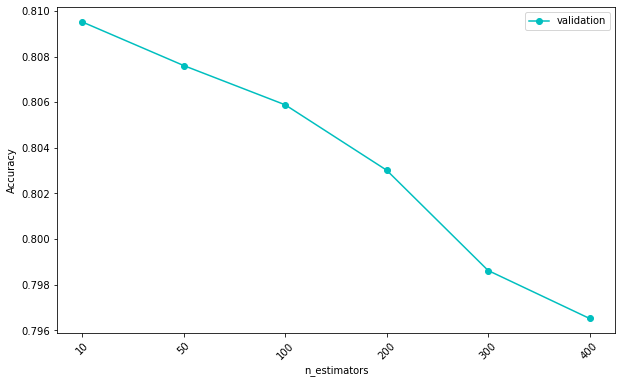

In [76]:
#Select the n_estimators hyper-parameter and apply cross validation to find the best value.
est_temp = [10, 50, 100, 200, 300, 400]
accuracy_valid = []
for est in est_temp:
    gb = GradientBoostingClassifier(n_estimators=est, random_state =42)
    gb.fit(X_train, y_train)
    pred_train = ab.predict(X_train)
    score_valid= cross_val_score(gb,X_train, y_train, scoring = "accuracy", cv =5 )
    accuracy_valid.append(score_valid.mean())

plt.figure(figsize=(10,6))
plt.plot(accuracy_valid, 'co-',label = 'validation')
plt.xticks(np.arange(len(est_temp)), est_temp, rotation = 45)
plt.xlabel('n_estimators')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

#n_estimators:10

In [77]:
print("Accuracy score: ")
accuracy_valid

Accuracy score: 


[0.8095147567209235,
 0.8076039891815092,
 0.8058836957454696,
 0.8030185488539594,
 0.79862431311532,
 0.7965227062297633]

In [78]:
#grid search
params = {'n_estimators': est_temp, 'learning_rate': lr_temp, 'random_state': [42]}

grid_gb = GradientBoostingClassifier()
grid = GridSearchCV(estimator=grid_gb, param_grid=params, cv=5, verbose =1, scoring="balanced_accuracy", n_jobs=-1)

In [79]:
grid.fit(X_train, y_train)

Fitting 5 folds for each of 42 candidates, totalling 210 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  49 tasks      | elapsed:   10.2s
[Parallel(n_jobs=-1)]: Done 210 out of 210 | elapsed:   50.0s finished


GridSearchCV(cv=5, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.001, 0.005, 0.01, 0.05, 0.1, 0.5,
                                           1.0],
                         'n_estimators': [10, 50, 100, 200, 300, 400],
                         'random_state': [42]},
             scoring='balanced_accuracy', verbose=1)

In [80]:
grid.best_params_

{'learning_rate': 1.0, 'n_estimators': 400, 'random_state': 42}

In [81]:
grid.best_estimator_

GradientBoostingClassifier(learning_rate=1.0, n_estimators=400, random_state=42)

In [82]:
#For the best model:
gb = GradientBoostingClassifier(learning_rate=1.0, n_estimators=400, random_state =42)
gb.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=1.0, n_estimators=400, random_state=42)

In [83]:
#Accuracy Train
pred_train = clf_gb.predict(X_train)
print("Accuracy Scores (Train): ",metrics.accuracy_score(y_true = y_train, y_pred = pred_train))

#Accuracy Test
pred = clf_gb.predict(X_test)
print("Accuracy Scores (Test): ",metrics.accuracy_score(y_true = y_test, y_pred = pred))

Accuracy Scores (Train):  0.8295758502101643
Accuracy Scores (Test):  0.8065953654188949


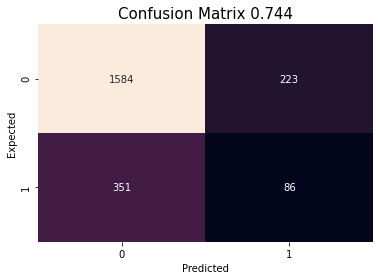

              precision    recall  f1-score   support

           0       0.82      0.88      0.85      1807
           1       0.28      0.20      0.23       437

    accuracy                           0.74      2244
   macro avg       0.55      0.54      0.54      2244
weighted avg       0.71      0.74      0.73      2244


Summary:
Recall/Sensitivity: 0.196796
Specificity: 0.876591
Precision: 0.278317
Balanced Accuracy: 0.536694
F1-score: 0.230563


In [84]:
fit_predict_score('Confusion Matrix',gb)   

In [85]:
#Compare the results to the model with default paramters. Any change?
#The default model: Recall/Sensitivity: 0.036613 Specificity: 0.992806 
#            Precision: 0.551724 Balanced Accuracy: 0.514710 F1-score: 0.068670
#The second model: Recall/Sensitivity: 0.196796 Specificity: 0.876591 
#            Precision: 0.278317 Balanced Accuracy: 0.536694 F1-score: 0.230563
#compare to these two models, the second model has a higher balanced accuracy, recall, and F1-score. Other than these
#three results, the second model has a lower values.

# Q8

- Using the Decision Tree, Random Forest, Adaboost, and Gradient Boosting classifer models:
    - Think of other ways of improving the accuracy and list at least two possibilities.
    - Implement both of the methods you proposed. 
    - Is the model recall increasing? Why do you think this might have helped?
    - If both of them did not improve, comment on why this might have been the case.
    - Optional: Apply different things and see if the recall is improving

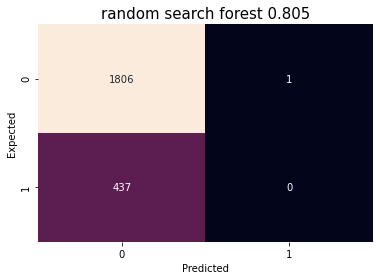

              precision    recall  f1-score   support

           0       0.81      1.00      0.89      1807
           1       0.00      0.00      0.00       437

    accuracy                           0.80      2244
   macro avg       0.40      0.50      0.45      2244
weighted avg       0.65      0.80      0.72      2244


Summary:
Recall/Sensitivity: 0.000000
Specificity: 0.999447
Precision: 0.000000
Balanced Accuracy: 0.499723
F1-score: 0.000000


In [87]:
# YOUR CODE
#Porpose 1: Randomized Search
#random forest randomized search 
from sklearn.model_selection import RandomizedSearchCV
param_dist_rf = {
    "max_depth": range(1,10,2),
    "max_features": range(1,10,2),
    "min_samples_split": range(1,5),
    "n_estimators": range(1,5)
}
rs = RandomizedSearchCV(clf_rf, param_dist_rf, n_iter=100, cv=10, random_state=1)
fit_predict_score('random search forest',rs)   

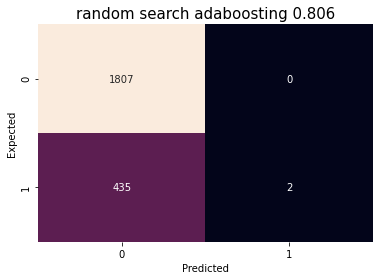

              precision    recall  f1-score   support

           0       0.81      1.00      0.89      1807
           1       1.00      0.00      0.01       437

    accuracy                           0.81      2244
   macro avg       0.90      0.50      0.45      2244
weighted avg       0.84      0.81      0.72      2244


Summary:
Recall/Sensitivity: 0.004577
Specificity: 1.000000
Precision: 1.000000
Balanced Accuracy: 0.502288
F1-score: 0.009112


In [88]:
#adaboosting randomized search 
param_dist_ada = {
    "learning_rate":[0.1,0.5,0.8,1,1.1,1.2,1.5],
    "n_estimators": range(1,5)
}
rs = RandomizedSearchCV(clf_ada, param_dist_ada, n_iter=100, cv=10, random_state=1)
fit_predict_score('random search adaboosting',rs)  

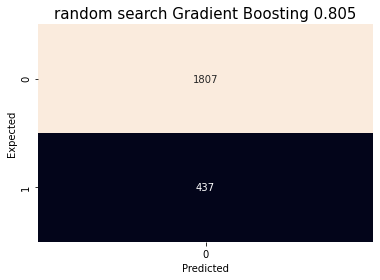

              precision    recall  f1-score   support

           0       0.81      1.00      0.89      1807
           1       0.00      0.00      0.00       437

    accuracy                           0.81      2244
   macro avg       0.40      0.50      0.45      2244
weighted avg       0.65      0.81      0.72      2244


Summary:
Recall/Sensitivity: 0.000000
Specificity: 1.000000
Precision: 0.000000
Balanced Accuracy: 0.500000
F1-score: 0.000000


In [89]:
#Gradient Boosting randomized search 
param_dist_gb = {
    "learning_rate":[0.1,0.5,0.8,1,1.1,1.2,1.5],
    "n_estimators": range(1,5)
}
rs = RandomizedSearchCV(clf_gb, param_dist_gb, n_iter=100, cv=10, random_state=1)
fit_predict_score('random search Gradient Boosting',rs)  

In [90]:
#Random searching procide a similar accuacy for all four models, but we observed a higher 
#recall for all models.

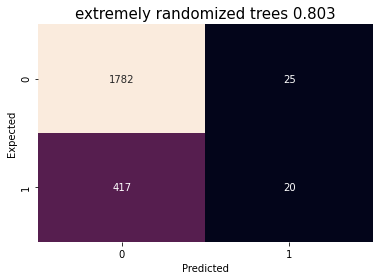

              precision    recall  f1-score   support

           0       0.81      0.99      0.89      1807
           1       0.44      0.05      0.08       437

    accuracy                           0.80      2244
   macro avg       0.63      0.52      0.49      2244
weighted avg       0.74      0.80      0.73      2244


Summary:
Recall/Sensitivity: 0.045767
Specificity: 0.986165
Precision: 0.444444
Balanced Accuracy: 0.515966
F1-score: 0.082988


In [91]:
#Porpose 2: Extremely Randomized Trees

from sklearn.ensemble import ExtraTreesClassifier
clf_tree1 = ExtraTreesClassifier()
fit_predict_score('extremely randomized trees',clf_tree1)  

In [92]:
#The extremely randomized trees method doesn't increase precision and accuracy.

# Q9

- Choose the best fitted model for each of teh classifiers (1 model for each of Decision Tree, Random Forest, Adaboost, and Gradient Boosting)
- Create a table summarizing results on the test set:
    - Create confusion matrix for each model
    - Either using the confusion matrix or the methods in `sklearn.metrics` get the following metrics on the testing set:
        - Recall (Sensitivity)
        - Specificity
        - Precision
        - Balanced Accuracy
        - F1 Score

Fitting 5 folds for each of 42 candidates, totalling 210 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    9.0s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   48.7s
[Parallel(n_jobs=-1)]: Done 210 out of 210 | elapsed:   59.2s finished


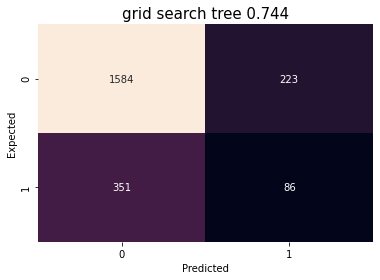

              precision    recall  f1-score   support

           0       0.82      0.88      0.85      1807
           1       0.28      0.20      0.23       437

    accuracy                           0.74      2244
   macro avg       0.55      0.54      0.54      2244
weighted avg       0.71      0.74      0.73      2244


Summary:
Recall/Sensitivity: 0.196796
Specificity: 0.876591
Precision: 0.278317
Balanced Accuracy: 0.536694
F1-score: 0.230563


In [93]:
# YOUR CODE
#best decision tree: grid search 
fit_predict_score('grid search tree',grid)   

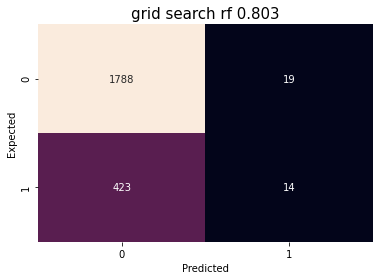

              precision    recall  f1-score   support

           0       0.81      0.99      0.89      1807
           1       0.42      0.03      0.06       437

    accuracy                           0.80      2244
   macro avg       0.62      0.51      0.47      2244
weighted avg       0.73      0.80      0.73      2244


Summary:
Recall/Sensitivity: 0.032037
Specificity: 0.989485
Precision: 0.424242
Balanced Accuracy: 0.510761
F1-score: 0.059574


In [94]:
#best random forest: grid search 
fit_predict_score('grid search rf',grid_rf)  

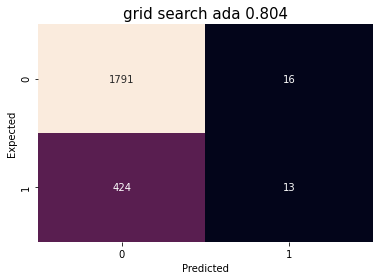

              precision    recall  f1-score   support

           0       0.81      0.99      0.89      1807
           1       0.45      0.03      0.06       437

    accuracy                           0.80      2244
   macro avg       0.63      0.51      0.47      2244
weighted avg       0.74      0.80      0.73      2244


Summary:
Recall/Sensitivity: 0.029748
Specificity: 0.991146
Precision: 0.448276
Balanced Accuracy: 0.510447
F1-score: 0.055794


In [95]:
#best adaboosting : grid search 
fit_predict_score('grid search ada',grid_ab)   

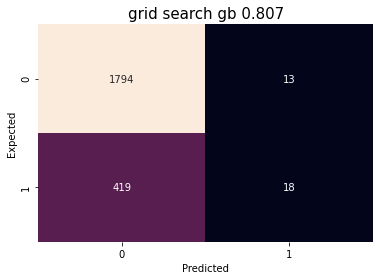

              precision    recall  f1-score   support

           0       0.81      0.99      0.89      1807
           1       0.58      0.04      0.08       437

    accuracy                           0.81      2244
   macro avg       0.70      0.52      0.48      2244
weighted avg       0.77      0.81      0.73      2244


Summary:
Recall/Sensitivity: 0.041190
Specificity: 0.992806
Precision: 0.580645
Balanced Accuracy: 0.516998
F1-score: 0.076923


In [96]:
#best gradient boosting : grid search 
fit_predict_score('grid search gb',grid_gb)   

# Q10

- Choose a winner model.
- Make predictions on the hold-out set whose outcome variables are not known (data we imported as: `loans_outcome_not_known`).
- Write the code below to make predictions with this model. At the end it should output the prediction of the labels.
- Save the predictions in a csv file
- There should be a single column in the csv file.
- The column header should be 'predictions'
- Your prediction performance will be calculated and a ranking will be performed 

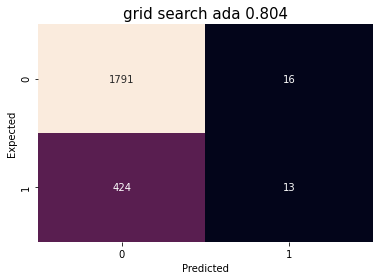

              precision    recall  f1-score   support

           0       0.81      0.99      0.89      1807
           1       0.45      0.03      0.06       437

    accuracy                           0.80      2244
   macro avg       0.63      0.51      0.47      2244
weighted avg       0.74      0.80      0.73      2244


Summary:
Recall/Sensitivity: 0.029748
Specificity: 0.991146
Precision: 0.448276
Balanced Accuracy: 0.510447
F1-score: 0.055794


In [97]:
# YOUR CODE
#best model: adaboosting : grid search 
fit_predict_score('grid search ada',grid_ab)   

In [98]:
loans_outcome_not_known.head(5)

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec
0,1,debt_consolidation,0.1324,540.96,10.596635,11.73,672,3210.000000,5671,55.1,0,0,0
1,0,educational,0.1221,333.15,11.156193,15.82,707,5314.000000,107643,81.0,3,0,0
2,1,debt_consolidation,0.1218,166.50,10.753836,6.38,772,1440.000000,233,6.7,0,0,0
3,0,major_purchase,0.1461,124.12,10.239960,0.00,692,1530.041667,0,0.0,6,0,0
4,1,credit_card,0.0800,156.69,10.434116,15.85,767,10170.000000,5748,12.3,0,1,0


In [99]:
feats = ['purpose']
new_data = pd.get_dummies(loans_outcome_not_known,columns=feats,drop_first=True)
new_data.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1324,540.96,10.596635,11.73,672,3210.000000,5671,55.1,0,0,0,0,1,0,0,0,0
1,0,0.1221,333.15,11.156193,15.82,707,5314.000000,107643,81.0,3,0,0,0,0,1,0,0,0
2,1,0.1218,166.50,10.753836,6.38,772,1440.000000,233,6.7,0,0,0,0,1,0,0,0,0
3,0,0.1461,124.12,10.239960,0.00,692,1530.041667,0,0.0,6,0,0,0,0,0,0,1,0
4,1,0.0800,156.69,10.434116,15.85,767,10170.000000,5748,12.3,0,1,0,1,0,0,0,0,0


In [100]:
#predict using grid search adaboosting
predictions = grid_ab.predict(new_data)
np.savetxt("prediction.csv", predictions, delimiter=",",header = "prediction")

# Great Job!